In [5]:
import sys
sys.path.append('../')

In [6]:
from src.loaders import generic_loaders

In [7]:
import yaml

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
with open('../training_configs/dataset/eyes.yaml') as f:
    ds_cfg = yaml.safe_load(f)
ds_cfg

{'gatherers': [{'matcher_kwargs': {'targets': '/mnt/HD-LSDF/Medaka/segmentations/workshop/eyes_to_train/{}.nii',
    'volumes': '/mnt/HD-LSDF/Medaka/segmentations/workshop/proper_images/{}.tif'},
   'seed': 42}],
 'datasets': [{'dataset_names': 'default',
   'dataset_kwargs': {'mode_3d': False,
    'use_ram': True,
    'localised_crop': True,
    'segmentation_kwargs': {'label_converter': {0: 0,
      1: 1,
      2: 1,
      3: 0,
      4: 0,
      5: 3,
      6: 3,
      7: 4,
      8: 4,
      9: 5,
      10: 5,
      11: 6,
      12: 6}}}},
  {'dataset_names': 'train',
   'aug_name': 'medium_aug_rot',
   'dataset_kwargs': {'crop_size': 256},
   'dataset_rebalance_function_name': 'TVSD_dataset_resample',
   'dataloader_kwargs': {'batch_size': 64}},
  {'dataset_names': 'valid',
   'dataset_kwargs': {'crop_size': 512},
   'dataloader_kwargs': {'batch_size': 256}}]}

In [9]:
ds_cfg['datasets'][0]['dataloader_kwargs'] = {'num_workers': 0}
ds_cfg['gatherers'][0]['split_kwargs'] = {'volumes_limit': 4}
ds_cfg

{'gatherers': [{'matcher_kwargs': {'targets': '/mnt/HD-LSDF/Medaka/segmentations/workshop/eyes_to_train/{}.nii',
    'volumes': '/mnt/HD-LSDF/Medaka/segmentations/workshop/proper_images/{}.tif'},
   'seed': 42,
   'split_kwargs': {'volumes_limit': 4}}],
 'datasets': [{'dataset_names': 'default',
   'dataset_kwargs': {'mode_3d': False,
    'use_ram': True,
    'localised_crop': True,
    'segmentation_kwargs': {'label_converter': {0: 0,
      1: 1,
      2: 1,
      3: 0,
      4: 0,
      5: 3,
      6: 3,
      7: 4,
      8: 4,
      9: 5,
      10: 5,
      11: 6,
      12: 6}}},
   'dataloader_kwargs': {'num_workers': 0}},
  {'dataset_names': 'train',
   'aug_name': 'medium_aug_rot',
   'dataset_kwargs': {'crop_size': 256},
   'dataset_rebalance_function_name': 'TVSD_dataset_resample',
   'dataloader_kwargs': {'batch_size': 64}},
  {'dataset_names': 'valid',
   'dataset_kwargs': {'crop_size': 512},
   'dataloader_kwargs': {'batch_size': 256}}]}

In [10]:
%%time
loaders_1 = generic_loaders(**ds_cfg, seed=42)

{'train': {'dataset_kwargs': {'mode_3d': False, 'use_ram': True, 'localised_crop': True, 'segmentation_kwargs': {'label_converter': {0: 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 3, 6: 3, 7: 4, 8: 4, 9: 5, 10: 5, 11: 6, 12: 6}}, 'crop_size': 256}, 'dataloader_kwargs': {'num_workers': 0, 'batch_size': 64}, 'aug_name': 'medium_aug_rot', 'dataset_rebalance_function_name': 'TVSD_dataset_resample'}, 'valid': {'dataset_kwargs': {'mode_3d': False, 'use_ram': True, 'localised_crop': True, 'segmentation_kwargs': {'label_converter': {0: 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 3, 6: 3, 7: 4, 8: 4, 9: 5, 10: 5, 11: 6, 12: 6}}, 'crop_size': 512}, 'dataloader_kwargs': {'num_workers': 0, 'batch_size': 256}}}
CPU times: user 51.4 s, sys: 10.8 s, total: 1min 2s
Wall time: 1min 3s


In [11]:
%%time
btch = loaders_1[0]['train'].__iter__().__next__()

CPU times: user 9.38 s, sys: 2.1 s, total: 11.5 s
Wall time: 8.2 s


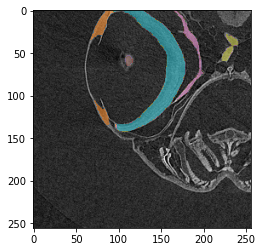

In [22]:
i = 2
plt.imshow(btch[0][i][0], cmap='gray')
plt.imshow(btch[1][i][0], cmap='tab10', alpha=(btch[1][i][0] > 0)*0.5)

In [23]:
with open('../training_configs/dataset/eyes.yaml') as f:
    ds_cfg = yaml.safe_load(f)
ds_cfg

{'gatherers': [{'matcher_kwargs': {'targets': '/mnt/HD-LSDF/Medaka/segmentations/workshop/eyes_to_train/{}.nii',
    'volumes': '/mnt/HD-LSDF/Medaka/segmentations/workshop/proper_images/{}.tif'},
   'seed': 42}],
 'datasets': [{'dataset_names': 'default',
   'dataset_kwargs': {'mode_3d': False,
    'use_ram': True,
    'localised_crop': True,
    'segmentation_kwargs': {'label_converter': {0: 0,
      1: 1,
      2: 1,
      3: 0,
      4: 0,
      5: 3,
      6: 3,
      7: 4,
      8: 4,
      9: 5,
      10: 5,
      11: 6,
      12: 6}}}},
  {'dataset_names': 'train',
   'aug_name': 'medium_aug_rot',
   'dataset_kwargs': {'crop_size': 256},
   'dataset_rebalance_function_name': 'TVSD_dataset_resample',
   'dataloader_kwargs': {'batch_size': 64}},
  {'dataset_names': 'valid',
   'dataset_kwargs': {'crop_size': 512},
   'dataloader_kwargs': {'batch_size': 256}}]}

In [24]:
ds_cfg['datasets'][0]['dataloader_kwargs'] = {'num_workers': 0}
ds_cfg['datasets'][0]['dataset_kwargs']['use_ram'] = False
ds_cfg['gatherers'][0]['split_kwargs'] = {'volumes_limit': 4}
ds_cfg

{'gatherers': [{'matcher_kwargs': {'targets': '/mnt/HD-LSDF/Medaka/segmentations/workshop/eyes_to_train/{}.nii',
    'volumes': '/mnt/HD-LSDF/Medaka/segmentations/workshop/proper_images/{}.tif'},
   'seed': 42,
   'split_kwargs': {'volumes_limit': 4}}],
 'datasets': [{'dataset_names': 'default',
   'dataset_kwargs': {'mode_3d': False,
    'use_ram': False,
    'localised_crop': True,
    'segmentation_kwargs': {'label_converter': {0: 0,
      1: 1,
      2: 1,
      3: 0,
      4: 0,
      5: 3,
      6: 3,
      7: 4,
      8: 4,
      9: 5,
      10: 5,
      11: 6,
      12: 6}}},
   'dataloader_kwargs': {'num_workers': 0}},
  {'dataset_names': 'train',
   'aug_name': 'medium_aug_rot',
   'dataset_kwargs': {'crop_size': 256},
   'dataset_rebalance_function_name': 'TVSD_dataset_resample',
   'dataloader_kwargs': {'batch_size': 64}},
  {'dataset_names': 'valid',
   'dataset_kwargs': {'crop_size': 512},
   'dataloader_kwargs': {'batch_size': 256}}]}

In [25]:
%%time
loaders_1 = generic_loaders(**ds_cfg, seed=42)

{'train': {'dataset_kwargs': {'mode_3d': False, 'use_ram': False, 'localised_crop': True, 'segmentation_kwargs': {'label_converter': {0: 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 3, 6: 3, 7: 4, 8: 4, 9: 5, 10: 5, 11: 6, 12: 6}}, 'crop_size': 256}, 'dataloader_kwargs': {'num_workers': 0, 'batch_size': 64}, 'aug_name': 'medium_aug_rot', 'dataset_rebalance_function_name': 'TVSD_dataset_resample'}, 'valid': {'dataset_kwargs': {'mode_3d': False, 'use_ram': False, 'localised_crop': True, 'segmentation_kwargs': {'label_converter': {0: 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 3, 6: 3, 7: 4, 8: 4, 9: 5, 10: 5, 11: 6, 12: 6}}, 'crop_size': 512}, 'dataloader_kwargs': {'num_workers': 0, 'batch_size': 256}}}
CPU times: user 590 ms, sys: 92.4 ms, total: 683 ms
Wall time: 857 ms


In [7]:
%%time
btch = loaders_1[0]['train'].__iter__().__next__()

CPU times: user 9.14 s, sys: 1.96 s, total: 11.1 s
Wall time: 8.95 s
